# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [2]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [29]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
mean = round(df['EMISSIONS'].mean(), 2)
median = round(df['EMISSIONS'].median(), 2)
mode = round(df['EMISSIONS'].mode(), 2)

print("산술평균:", mean)
print("중앙값:", median)
print("최빈값:", mode)
print("")
# TODO 2: 절사평균 계산
trimmed_mean = round(stats.trim_mean(df['EMISSIONS'], 0.1), 2)
trimmed_mean2 = round(stats.trim_mean(df['EMISSIONS'], 0.2), 2)


print("절사평균 (10%):", trimmed_mean)
print("절사평균 (20%):", trimmed_mean2)
print("")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
weights = {
    'COMPACT': 0.5,
    'MID-SIZE': 0.3,
    'SUV': 0.2
}

compact_mean = round(df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].mean(), 2)
midsize_mean = round(df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].mean(), 2)
suv_mean = round(df[df['VEHICLE CLASS'] == 'SUV']['EMISSIONS'].mean(), 2)

print("COMPACT 평균:", compact_mean)
print("MID-SIZE 평균:", midsize_mean)
print("SUV 평균:", suv_mean)
print("")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
compact_median = round(df[df['VEHICLE CLASS'] == 'COMPACT']['EMISSIONS'].median(), 2)
midsize_median = round(df[df['VEHICLE CLASS'] == 'MID-SIZE']['EMISSIONS'].median(), 2)
suv_median = round(df[df['VEHICLE CLASS'] == 'SUV']['EMISSIONS'].median(), 2)

compact = round(compact_mean / compact_median, 2)
midsize = round(midsize_mean / midsize_median, 2)
suv = round(suv_mean / suv_median, 2)

print("COMPACT 평균/중앙값 :", compact)
print("MID-SIZE 평균/중앙값 :", midsize)
print("SUV 평균/중앙값 :", suv)
print("")

# TODO 5: 결과 해석 (print문으로 작성)
# TODO 5: 결과 해석 (f-string, 해석 간단히)
print("="*50)
print(f"COMPACT 차량은 평균이 중앙값보다 {'큼' if compact > 1 else '작음'}, 비율: {compact}")
print(f"MID-SIZE 차량은 평균이 중앙값보다 {'큼' if midsize > 1 else '작음'}, 비율: {midsize}")
print(f"SUV 차량은 평균이 중앙값보다 {'큼' if suv > 1 else '작음'}, 비율: {suv}")


산술평균: 250.07
중앙값: 243.0
최빈값: 0    221
Name: EMISSIONS, dtype: int64

절사평균 (10%): 247.34
절사평균 (20%): 245.4

COMPACT 평균: 211.54
MID-SIZE 평균: 223.7
SUV 평균: 270.3

COMPACT 평균/중앙값 : 1.02
MID-SIZE 평균/중앙값 : 1.01
SUV 평균/중앙값 : 1.01

COMPACT 차량은 평균이 중앙값보다 큼, 비율: 1.02
MID-SIZE 차량은 평균이 중앙값보다 큼, 비율: 1.01
SUV 차량은 평균이 중앙값보다 큼, 비율: 1.01


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

COMB (L/100 km)
분산: 8.47
표준편차: 2.91
범위: 22.5
IQR: 3.6

ENGINE SIZE
분산: 1.78
표준편차: 1.34
범위: 7.6
IQR: 1.9

변동계수 (CV)
COMB (L/100 km): 0.26
ENGINE SIZE: 0.4

COMB 이상치 (IQR): 548
ENGINE SIZE 이상치 (IQR): 41
COMB 이상치 (Z-score): 219
ENGINE SIZE 이상치 (Z-score): 41



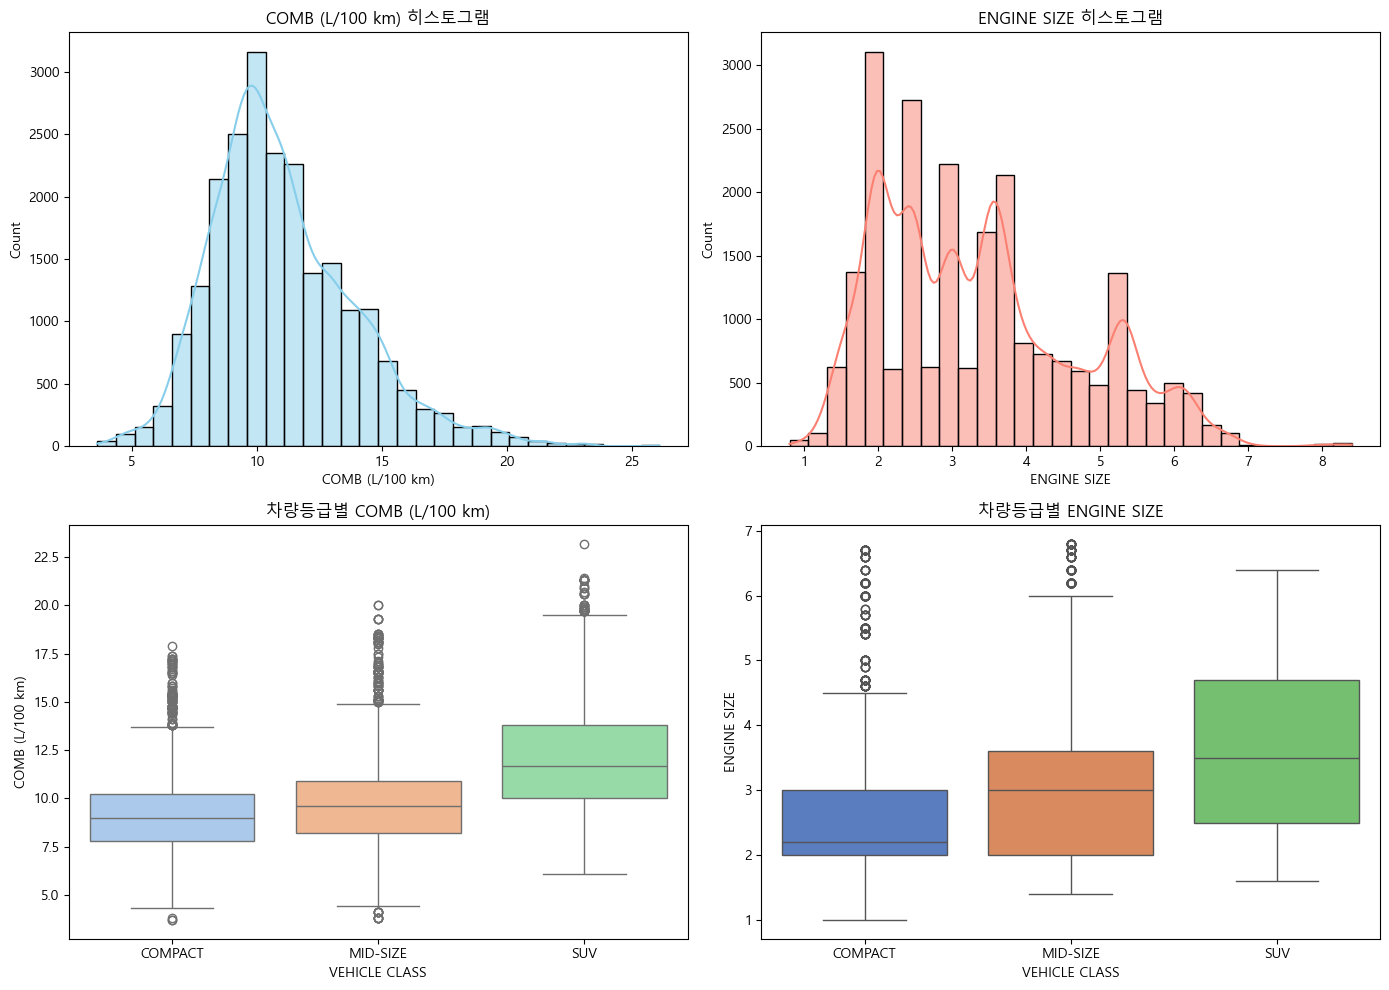

COMB (L/100 km) 표준편차
COMPACT: 2.06
MID-SIZE: 2.4
SUV: 2.71
COMPACT: 1.08
MID-SIZE: 1.19
SUV: 1.2


In [55]:
# TODO 1: 두 변수의 산포 측도 계산
comb = df['COMB (L/100 km)']
engine = df['ENGINE SIZE']

## comb
comb_var = round(comb.var(), 2)
comb_std = round(comb.std(), 2)
comb_range = round(comb.max() - comb.min(), 2)
comb_iqr = round(comb.quantile(0.75) - comb.quantile(0.25), 2)

print("COMB (L/100 km)")
print("분산:", comb_var)
print("표준편차:", comb_std)
print("범위:", comb_range)
print("IQR:", comb_iqr)
print("")

## engine
engine_var = round(engine.var(), 2)
engine_std = round(engine.std(), 2)
engine_range = round(engine.max() - engine.min(), 2)
engine_iqr = round(engine.quantile(0.75) - engine.quantile(0.25), 2)

print("ENGINE SIZE")
print("분산:", engine_var)
print("표준편차:", engine_std)
print("범위:", engine_range)
print("IQR:", engine_iqr)
print("")

# TODO 2: 변동계수(CV) 계산
comb_cv = round(comb.std() / comb.mean(), 2)
engine_cv = round(engine.std() / engine.mean(), 2)
print("변동계수 (CV)")
print(f"COMB (L/100 km): {comb_cv}")
print(f"ENGINE SIZE: {engine_cv}")
print("")

# TODO 3: 이상치 탐지 (IQR, Z-score)
## iqr
def iqr_cut(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return s[(s < low) | (s > high)]

comb_iqr = iqr_cut(comb)
engine_iqr = iqr_cut(engine)

print(f"COMB 이상치 (IQR): {len(comb_iqr)}")
print(f"ENGINE SIZE 이상치 (IQR): {len(engine_iqr)}")

## z-score
comb_z = comb[np.abs(stats.zscore(comb)) > 3]
engine_z = engine[np.abs(stats.zscore(engine)) > 3]

print(f"COMB 이상치 (Z-score): {len(comb_z)}")
print(f"ENGINE SIZE 이상치 (Z-score): {len(engine_z)}")
print("")

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['COMB (L/100 km)'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("COMB (L/100 km) 히스토그램")

sns.histplot(df['ENGINE SIZE'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("ENGINE SIZE 히스토그램")

sns.boxplot(data=df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])],
            x='VEHICLE CLASS', y='COMB (L/100 km)', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("차량등급별 COMB (L/100 km)")

sns.boxplot(data=df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])],
            x='VEHICLE CLASS', y='ENGINE SIZE', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("차량등급별 ENGINE SIZE")

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
## comb
comb_std_compact = round(df[df['VEHICLE CLASS'] == 'COMPACT']['COMB (L/100 km)'].std(), 2)
comb_std_midsize = round(df[df['VEHICLE CLASS'] == 'MID-SIZE']['COMB (L/100 km)'].std(), 2)
comb_std_suv = round(df[df['VEHICLE CLASS'] == 'SUV']['COMB (L/100 km)'].std(), 2)

print("COMB (L/100 km) 표준편차")
print(f"COMPACT: {comb_std_compact}")
print(f"MID-SIZE: {comb_std_midsize}")
print(f"SUV: {comb_std_suv}")

## engine size
engine_std_compact = round(df[df['VEHICLE CLASS'] == 'COMPACT']['ENGINE SIZE'].std(), 2)
engine_std_midsize = round(df[df['VEHICLE CLASS'] == 'MID-SIZE']['ENGINE SIZE'].std(), 2)
engine_std_suv = round(df[df['VEHICLE CLASS'] == 'SUV']['ENGINE SIZE'].std(), 2)

print(f"COMPACT: {engine_std_compact}")
print(f"MID-SIZE: {engine_std_midsize}")
print(f"SUV: {engine_std_suv}")

# TODO 6: 결과 해석

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

왜도
ENGINE SIZE        0.63
COMB (L/100 km)    0.82
COMB (mpg)         1.17
EMISSIONS          0.53
dtype: float64

첨도
ENGINE SIZE       -0.39
COMB (L/100 km)    1.05
COMB (mpg)         3.64
EMISSIONS          0.62
dtype: float64


,왜도,첨도,왜도 해석,첨도 해석
ENGINE SIZE,0.63,-0.39,오른쪽 꼬리,꼬리 얇음
COMB (L/100 km),0.82,1.05,오른쪽 꼬리,꼬리 두꺼움
COMB (mpg),1.17,3.64,오른쪽 꼬리,꼬리 두꺼움
EMISSIONS,0.53,0.62,오른쪽 꼬리,꼬리 두꺼움


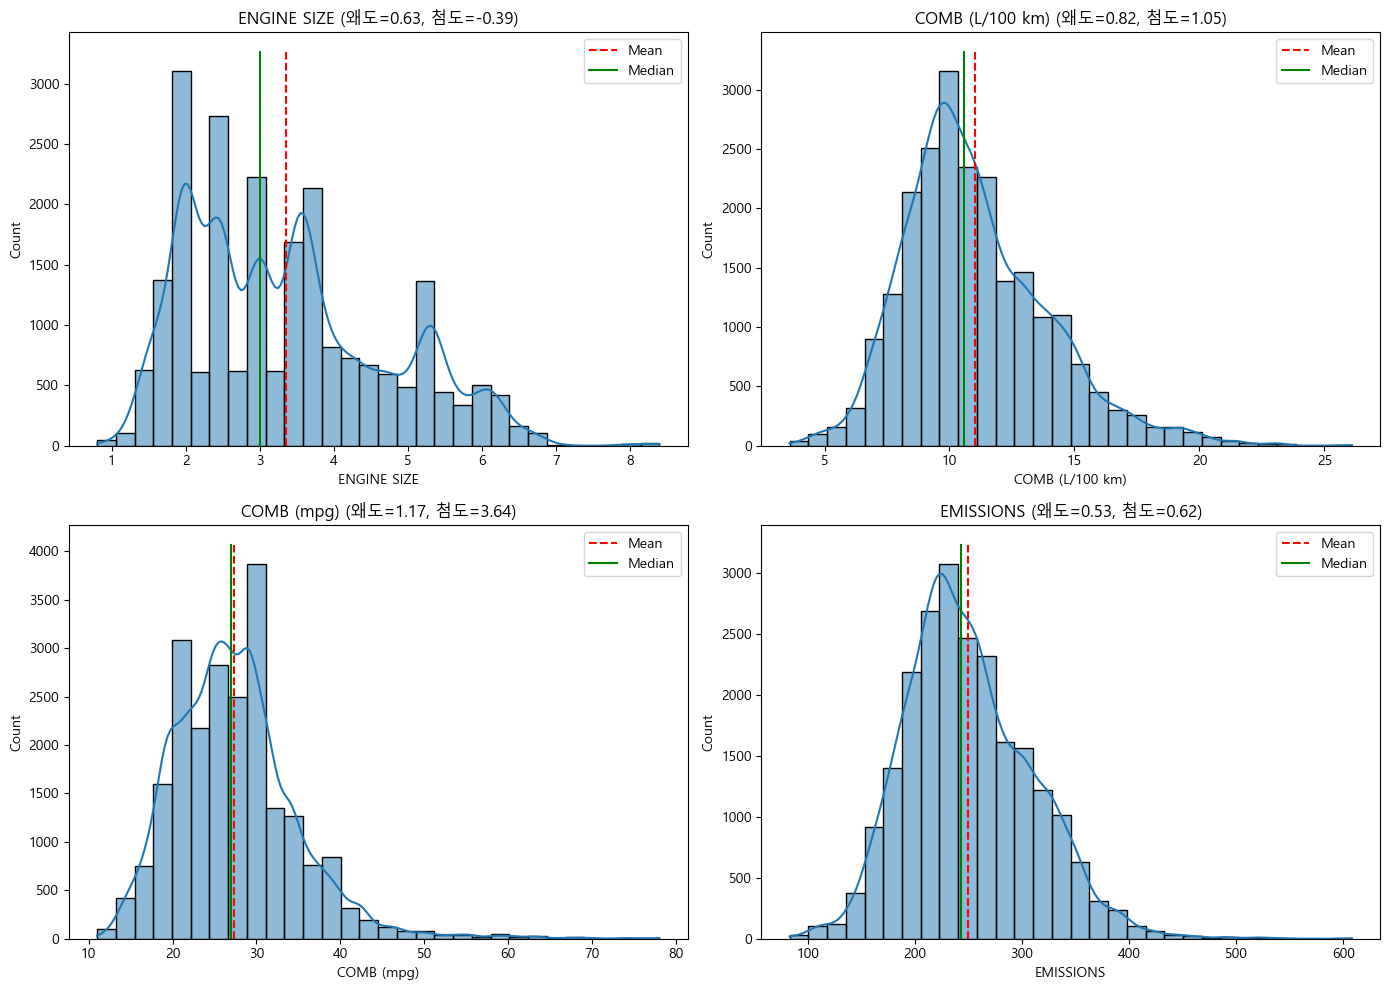

,FUEL,왜도,첨도
0,D,-0.37,-1.04
1,E,-0.19,-0.26
2,N,-1.85,3.07
3,X,0.33,-0.29
4,Z,1.00,1.61



결과 해석:
연료 D: 왜도=-0.37 (왼쪽 꼬리), 첨도=-1.04 (꼬리 얇음)
연료 E: 왜도=-0.19 (왼쪽 꼬리), 첨도=-0.26 (꼬리 얇음)
연료 N: 왜도=-1.85 (왼쪽 꼬리), 첨도=3.07 (꼬리 두꺼움)
연료 X: 왜도=0.33 (오른쪽 꼬리), 첨도=-0.29 (꼬리 얇음)
연료 Z: 왜도=1.0 (오른쪽 꼬리), 첨도=1.61 (꼬리 두꺼움)


In [69]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
skewness = df[numeric_cols].skew().round(2)
kurtosis = df[numeric_cols].kurt().round(2)

print("왜도")
print(skewness)
print("")
print("첨도")
print(kurtosis)

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
def skew(x):
    if x > 0:
        return "오른쪽 꼬리"
    elif x < 0:
        return "왼쪽 꼬리"
    else:
        return "대칭"

def kurt(x):
    if x > 0:
        return "꼬리 두꺼움"
    elif x < 0:
        return "꼬리 얇음"
    else:
        return "정규분포와 동일"

result = pd.DataFrame({
    '왜도': skewness,
    '첨도': kurtosis,
    '왜도 해석': skewness.apply(skew),
    '첨도 해석': kurtosis.apply(kurt)
})

display(result)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
#### GPT 도움
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

for i, col in enumerate(cols):
    row, col_idx = i // 2, i % 2
    ax = axes[row, col_idx]
    
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    
    mean = df[col].mean()
    median = df[col].median()
    ymin, ymax = ax.get_ylim()
    
    ax.plot([mean, mean], [ymin, ymax], color='red', linestyle='--', label='Mean')
    ax.plot([median, median], [ymin, ymax], color='green', linestyle='-', label='Median')
    
    sk = skewness[col]
    kt = kurtosis[col]
    ax.set_title(f"{col} (왜도={sk}, 첨도={kt})")
    ax.legend()

plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_stats = df.groupby('FUEL')['EMISSIONS'].agg(
    왜도=lambda x: round(x.skew(), 2),
    첨도=lambda x: round(x.kurt(), 2)
).reset_index()

display(fuel_stats)
print("")

# TODO 5: 결과 해석

print("결과 해석:")
for _, row in fuel_stats.iterrows():
    fuel = row['FUEL']
    skew = row['왜도']
    kurt = row['첨도']
    
    skew_dir = '오른쪽 꼬리' if skew > 0 else '왼쪽 꼬리' if skew < 0 else '대칭'
    kurt_type = '꼬리 두꺼움' if kurt > 0 else '꼬리 얇음' if kurt < 0 else '정규분포와 동일'
    
    print(f"연료 {fuel}: 왜도={skew} ({skew_dir}), 첨도={kurt} ({kurt_type})")


---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [70]:
import math

def my_mean(data):
    return sum(data) / len(data)

def my_trimmed_mean(data, proportion):
    n = len(data)
    k = int(n * proportion)
    sorted_data = sorted(data)
    trimmed = sorted_data[k:n - k]
    return sum(trimmed) / len(trimmed)

def my_weighted_mean(data, weights):
    total_weight = sum(weights)
    weighted_sum = 0
    for x, w in zip(data, weights):
        weighted_sum += x * w
    return weighted_sum / total_weight

def my_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2

    if n % 2 == 1:
        return float(sorted_data[mid])
    else:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2

def my_mode(data):
    freq = {}
    for x in data:
        freq[x] = freq.get(x, 0) + 1

    max_count = 0
    mode_val = None
    for x in data:
        if freq[x] > max_count:
            max_count = freq[x]
            mode_val = x
    return mode_val


def my_variance(data, ddof=0):
    mean = my_mean(data)
    n = len(data)
    squared_diff = 0

    for x in data:
        squared_diff += (x - mean) ** 2

    return squared_diff / (n - ddof)


def my_std(data, ddof=0):
    return math.sqrt(my_variance(data, ddof))


def my_percentile(data, q):
    sorted_data = sorted(data)
    n = len(sorted_data)
    idx = round((n - 1) * q / 100)
    return sorted_data[idx]


def my_iqr(data):
    q1 = my_percentile(data, 25)
    q3 = my_percentile(data, 75)
    return q3 - q1


In [71]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
